In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

ton_iot = pd.read_csv('NF-ToN-IoT-v2.csv')
ton_iot_copy = ton_iot.copy()
ton_iot_copy.shape

(16940496, 45)

In [2]:
ton_iot_copy.shape

(16940496, 45)

## Correlation

In [ ]:
categorical_feature = ['L4_SRC_PORT','L4_DST_PORT','IPV4_SRC_ADDR',
                       'IPV4_DST_ADDR','PROTOCOL','L7_PROTO','DNS_QUERY_TYPE','ICMP_TYPE'
                        ,'ICMP_IPV4_TYPE','DNS_TTL_ANSWER']

not_used = ['DNS_QUERY_ID','FTP_COMMAND_RET_CODE']

tagets = ['Attack','Label']

to_drop = categorical_feature+not_used+tagets

X_corr_vif = ton_iot.drop(columns=to_drop)

In [ ]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
corr = X_corr_vif.corr()
corr.style.background_gradient(cmap='coolwarm')

,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,FLOW_DURATION_MILLISECONDS,DURATION_IN,DURATION_OUT,MIN_TTL,MAX_TTL,LONGEST_FLOW_PKT,SHORTEST_FLOW_PKT,MIN_IP_PKT_LEN,MAX_IP_PKT_LEN,SRC_TO_DST_SECOND_BYTES,DST_TO_SRC_SECOND_BYTES,RETRANSMITTED_IN_BYTES,RETRANSMITTED_IN_PKTS,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,NUM_PKTS_UP_TO_128_BYTES,NUM_PKTS_128_TO_256_BYTES,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT
IN_BYTES,1.000000,0.357168,0.037090,0.156172,0.004280,0.005480,0.003691,0.005992,0.009988,0.008666,0.006067,0.007493,0.015776,0.000888,0.001093,0.015776,nan,0.000000,0.059492,0.038401,0.074770,0.074486,0.170296,0.008430,0.038961,0.050082,0.167247,0.263966,0.789523,0.001172,0.001849
IN_PKTS,0.357168,1.000000,0.121450,0.143922,0.002698,0.004548,0.002633,0.012479,0.024250,0.021414,0.015894,0.021025,0.008991,-0.001936,-0.002711,0.008991,0.000000,0.000000,0.025262,0.039215,0.395779,0.373832,0.169769,0.028892,0.161568,0.059166,0.115114,0.147253,0.206766,0.000688,0.001354
OUT_BYTES,0.037090,0.121450,1.000000,0.431394,0.016467,0.018788,0.013277,0.008790,0.011447,0.015376,0.013570,0.014180,0.045672,-0.001142,0.004722,0.045672,-0.000000,0.000000,0.045648,0.028087,0.290079,0.270363,0.023509,0.222337,0.032279,0.079728,0.215708,0.269381,0.520902,0.013051,0.009929
OUT_PKTS,0.156172,0.143922,0.431394,1.000000,0.014752,0.015626,0.014033,0.012657,0.047995,0.062878,0.016173,0.018066,0.021935,-0.000941,0.007746,0.021935,-0.000000,0.000000,0.331501,0.152466,0.099993,0.134847,0.060098,0.080231,0.094454,0.141774,0.243923,0.296310,0.220964,0.010091,0.008182
TCP_FLAGS,0.004280,0.002698,0.016467,0.014752,1.000000,0.785870,0.953551,0.361176,0.195594,0.223215,0.601905,0.600929,0.548346,-0.204642,0.429659,0.548346,-0.000000,-0.000000,0.008499,0.013016,0.017340,0.051894,0.158082,0.176961,-0.028260,0.005177,0.024101,0.012865,0.009596,0.691277,0.617947
CLIENT_TCP_FLAGS,0.005480,0.004548,0.018788,0.015626,0.785870,1.000000,0.749894,0.422695,0.264198,0.294774,0.784719,0.783736,0.698450,-0.064396,0.348279,0.698450,-0.000000,-0.000000,0.010819,0.016426,0.020695,0.062478,0.201980,0.216151,-0.021205,0.008054,0.030098,0.015686,0.011170,0.871311,0.781273
SERVER_TCP_FLAGS,0.003691,0.002633,0.013277,0.014033,0.953551,0.749894,1.000000,0.398381,0.217956,0.251114,0.646188,0.645234,0.588179,-0.154813,0.532662,0.588179,-0.000000,-0.000000,0.007993,0.012144,0.017794,0.055883,0.168953,0.188063,-0.023668,0.005823,0.024735,0.012140,0.007236,0.744957,0.667345
FLOW_DURATION_MILLISECONDS,0.005992,0.012479,0.008790,0.012657,0.361176,0.422695,0.398381,1.000000,0.501553,0.520992,0.479919,0.480870,0.195439,0.000294,0.285500,0.195439,nan,0.000000,0.014072,0.020946,0.024762,0.082238,-0.049758,-0.043958,-0.009617,0.004158,0.027839,0.009819,0.005044,0.512049,0.442040
DURATION_IN,0.009988,0.024250,0.011447,0.047995,0.195594,0.264198,0.217956,0.501553,1.000000,0.873169,0.278519,0.281591,0.180013,-0.001938,0.138857,0.180013,nan,0.000000,0.019769,0.024779,0.014800,0.047763,-0.001203,-0.012288,0.000708,0.022519,0.057844,0.015781,0.004789,0.293527,0.303774
DURATION_OUT,0.008666,0.021414,0.015376,0.062878,0.223215,0.294774,0.251114,0.520992,0.873169,1.000000,0.293349,0.293108,0.212047,-0.006994,0.162855,0.212047,-0.000000,0.000000,0.018903,0.022589,0.019144,0.063158,0.003850,-0.011610,0.001102,0.049128,0.030378,0.017843,0.005168,0.328726,0.341421


# Preprocessing 

## rank the feature by high correlation 

In [ ]:
import numpy as np
cor_matrix = X_corr_vif.corr().abs()

upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
#print(upper_tri)

In [ ]:
to_drop_corr = [column for column in upper_tri.columns if any(upper_tri[column] > 0.94)]
print(to_drop_corr)

### Select the feature to drop with correlaion upper than 94%

In [ ]:
X_corr_vif.drop(columns=to_drop_corr, axis=1, inplace=True)


**We have 4 features to drop are  are '['SERVER_TCP_FLAGS', 'MAX_TTL', 'MAX_IP_PKT_LEN', 'RETRANSMITTED_OUT_PKTS']
**

In [ ]:
print(f' original data {len(X_corr_vif.columns)}')
ton_iot.drop(columns=to_drop_corr, axis=1, inplace=True)
ton_iot.drop(columns=not_used)
print(len(X_corr_vif.columns))
print((X_corr_vif.columns))


## Using VIF for numerical feature 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_corr_vif['SRC_TO_DST_SECOND_BYTES'] = X_corr_vif['SRC_TO_DST_SECOND_BYTES'].astype(int)
X_corr_vif['DST_TO_SRC_SECOND_BYTES'] = X_corr_vif['DST_TO_SRC_SECOND_BYTES'].astype(int)

X_scaled_red = pd.DataFrame()
scaler.fit(X_corr_vif)

X_scaled_red[X_corr_vif.columns] = scaler.transform(X_corr_vif)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.utils import shuffle


#shuffled = shuffle(X_scaled_red)
#X_scaled_red = shuffled[:2000000]

vif_scores = [variance_inflation_factor(X_scaled_red.values, feature)for feature in range(len(X_scaled_red.columns))]
vif = pd.DataFrame()
vif["features"] = X_scaled_red.columns
vif["VIF Factor"] = vif_scores
vif.sort_values(by=['VIF Factor'])

In [ ]:
vif_col = []

COLUMN = 'NUM_PKTS_1024_TO_1514_BYTES'
vif_col.append(COLUMN)

X_scaled_red.drop(columns=[COLUMN], inplace=True)
vif_scores = [variance_inflation_factor(X_scaled_red.values, feature)for feature in range(len(X_scaled_red.columns))]
vif = pd.DataFrame()
vif["features"] = X_scaled_red.columns
vif["VIF Factor"] = vif_scores
vif.sort_values(by=['VIF Factor'])

In [ ]:
COLUMN = 'CLIENT_TCP_FLAGS'
vif_col.append(COLUMN)

X_scaled_red.drop(columns=[COLUMN], inplace=True)
vif_scores = [variance_inflation_factor(X_scaled_red.values, feature)for feature in range(len(X_scaled_red.columns))]
vif = pd.DataFrame()
vif["features"] = X_scaled_red.columns
vif["VIF Factor"] = vif_scores
vif.sort_values(by=['VIF Factor'])

Shuffle the big class and apply the undersampling 

### Visualize data with profilling data 

In [ ]:
from pandas_profiling import ProfileReport
profile_ton = ProfileReport(ton_iot, minimal=True)
profile_ton

### Deletes features from 

In [3]:
categorical_feature = ['L4_SRC_PORT','L4_DST_PORT','IPV4_SRC_ADDR',
                       'IPV4_DST_ADDR','PROTOCOL','L7_PROTO','DNS_QUERY_TYPE','ICMP_TYPE'
                        ,'ICMP_IPV4_TYPE','DNS_TTL_ANSWER']

not_used = ['DNS_QUERY_ID','FTP_COMMAND_RET_CODE']

tagets = ['Attack','Label']

to_drop_corr_col = ['SERVER_TCP_FLAGS', 'MAX_TTL', 'MAX_IP_PKT_LEN', 'RETRANSMITTED_OUT_PKTS']

to_drop_VIF = ['NUM_PKTS_1024_TO_1514_BYTES', 'CLIENT_TCP_FLAGS']

to_drop = categorical_feature+not_used+tagets + to_drop_corr_col + to_drop_VIF

X_Numerical = ton_iot.drop(columns=to_drop)




In [4]:
X_Numerical['SRC_TO_DST_SECOND_BYTES'] = X_Numerical['SRC_TO_DST_SECOND_BYTES'].astype(int)
X_Numerical['DST_TO_SRC_SECOND_BYTES'] = X_Numerical['DST_TO_SRC_SECOND_BYTES'].astype(int)

In [5]:
X_Numerical.shape

(16940496, 25)

## Scaling of Numerical value using  quantile

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_Numerical_sc = pd.DataFrame()

scaler.fit(X_Numerical)

X_Numerical_sc[X_Numerical.columns] = scaler.transform(X_Numerical)

In [7]:
X_Numerical_sc.shape

(16940496, 25)

In [8]:
print('Numerical')
print(25*0.8)
print(25*0.5)
print(25*0.2)
print('categorical')
print(10*0.8)
print(10*0.5)
print(10*0.2)

Numerical
20.0
12.5
5.0
categorical
8.0
5.0
2.0


In [9]:
y_b = ton_iot['Label']

y_multi =  ton_iot['Attack']
print(y_b.value_counts())
print(y_multi.value_counts())

1    10841027
0     6099469
Name: Label, dtype: int64
Benign        6099469
scanning      3781419
xss           2455020
ddos          2026234
password      1153323
dos            712609
injection      684465
backdoor        16809
mitm             7723
ransomware       3425
Name: Attack, dtype: int64


## Scale data

In [10]:
from sklearn.feature_selection import f_classif, SelectKBest

sb = SelectKBest(f_classif, k=5)
sb.fit(X_Numerical_sc,y_b)
col_anova_20 = sb.get_feature_names_out()

##########################
sb = SelectKBest(f_classif, k=13)
sb.fit(X_Numerical_sc,y_b)
col_anova_50 = sb.get_feature_names_out()

##########################
sb = SelectKBest(f_classif, k=20)
sb.fit(X_Numerical_sc,y_b)
col_anova_80 = sb.get_feature_names_out()

In [52]:
sb.get_support()

array([False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True])

In [11]:
X_A_20 = X_Numerical_sc[col_anova_20]
X_A_50 = X_Numerical_sc[col_anova_50]
X_A_80 = X_Numerical_sc[col_anova_80]

In [41]:
col_anova_80

array(['TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'DURATION_IN',
       'DURATION_OUT', 'MIN_TTL', 'LONGEST_FLOW_PKT', 'SHORTEST_FLOW_PKT',
       'MIN_IP_PKT_LEN', 'SRC_TO_DST_SECOND_BYTES',
       'DST_TO_SRC_SECOND_BYTES', 'RETRANSMITTED_IN_BYTES',
       'RETRANSMITTED_IN_PKTS', 'RETRANSMITTED_OUT_BYTES',
       'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT',
       'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
       'NUM_PKTS_256_TO_512_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT'],
      dtype=object)

## Kendall

In [12]:
from scipy.stats import kendalltau
features = [col for col in X_Numerical_sc.columns if col ]
kendall_tau_scores = {}
for feature in features:
    kendall_tau, _ = kendalltau(X_Numerical_sc[feature], y_b)
    kendall_tau_scores[feature] = kendall_tau
    
sorted_kendall_tau_scores = sorted(kendall_tau_scores.items(), key=lambda x: abs(x[1]), reverse=True)

col_kendall_20 = [feature for feature, score in sorted_kendall_tau_scores[:5]]
col_kendall_50 = [feature for feature, score in sorted_kendall_tau_scores[:13]]
col_kendall_80 = [feature for feature, score in sorted_kendall_tau_scores[:20]]


In [13]:
X_K_20 = X_Numerical_sc[col_kendall_20]
X_K_50 = X_Numerical_sc[col_kendall_50]
X_K_80 = X_Numerical_sc[col_kendall_80]
X_K_80.columns

Index(['LONGEST_FLOW_PKT', 'IN_BYTES', 'SRC_TO_DST_SECOND_BYTES',
       'TCP_WIN_MAX_IN', 'OUT_BYTES', 'NUM_PKTS_UP_TO_128_BYTES',
       'DST_TO_SRC_SECOND_BYTES', 'MIN_IP_PKT_LEN', 'OUT_PKTS', 'MIN_TTL',
       'TCP_WIN_MAX_OUT', 'IN_PKTS', 'SHORTEST_FLOW_PKT',
       'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT',
       'NUM_PKTS_512_TO_1024_BYTES', 'DURATION_OUT',
       'NUM_PKTS_256_TO_512_BYTES', 'FLOW_DURATION_MILLISECONDS',
       'DURATION_IN'],
      dtype='object')

## PCA

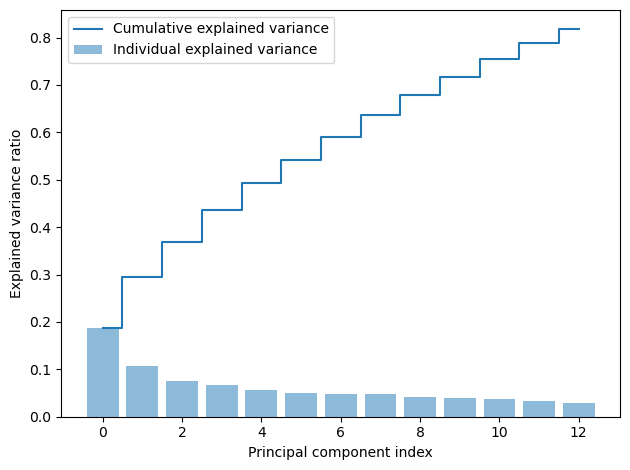

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
import numpy as np 

pca = PCA(n_components=13)

#
X_train_pca = pca.fit_transform(X_Numerical_sc)

exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)


plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [15]:
X_train_pca.shape
columns_pca = [f"C{idx}" for idx in range(13) ]
X_PCA = pd.DataFrame(X_train_pca,columns=columns_pca)


In [16]:
cum_sum_eigenvalues

array([0.1870269 , 0.29380058, 0.36877868, 0.43609222, 0.49254252,
       0.54261555, 0.59029296, 0.63724733, 0.67848168, 0.71722174,
       0.75487241, 0.78764894, 0.81716173])

In [17]:
X_cat = ton_iot[categorical_feature]

# Optimize the features

### L4_SRC_PORT & L4_DST_PORT

Ports with numbers 0–1023 are called system or well-known ports; ports with numbers 1024-49151 are called user or registered ports, and ports with numbers 49152-65535 are called dynamic, private or ephemeral ports.[2] Both system and user ports are used by transport protocols (TCP, UDP, DCCP, SCTP) to identify an application or service.

In [18]:
well_known_port = list(range(1024))
registered_ports = list(range(1024,49152))
ephemeral_ports = list(range(49152,65535))

In [19]:
X_cat['L4_SRC_PORT_C'] = 'Others'
X_cat['L4_SRC_PORT_C'][X_cat['L4_SRC_PORT'].isin(well_known_port)] = 'well_known_port'
X_cat['L4_SRC_PORT_C'][X_cat['L4_SRC_PORT'].isin(registered_ports)] = 'registered_ports'
X_cat['L4_SRC_PORT_C'][X_cat['L4_SRC_PORT'].isin(ephemeral_ports)] = 'ephemeral_ports'

X_cat.drop(columns=['L4_SRC_PORT'],inplace=True)

X_cat['L4_SRC_PORT_C'].value_counts()

print(X_cat.shape)

(16940496, 10)


In [20]:
X_cat['L4_DST_PORT_C'] = 'Others'
X_cat['L4_DST_PORT_C'][X_cat['L4_DST_PORT'].isin(well_known_port)] = 'well_known_port'
X_cat['L4_DST_PORT_C'][X_cat['L4_DST_PORT'].isin(registered_ports)] = 'registered_ports'
X_cat['L4_DST_PORT_C'][X_cat['L4_DST_PORT'].isin(ephemeral_ports)] = 'ephemeral_ports'

X_cat.drop(columns=['L4_DST_PORT'],inplace=True)
X_cat['L4_DST_PORT_C'].value_counts()


well_known_port     9232384
registered_ports    6540544
ephemeral_ports     1167508
Others                   60
Name: L4_DST_PORT_C, dtype: int64

#### Removerd features are :

to_drop_zero = ['RETRANSMITTED_IN_BYTES','RETRANSMITTED_IN_PKTS','RETRANSMITTED_OUT_BYTES','FTP_COMMAND_RET_CODE','ICMP_TYPE','DNS_TTL_ANSWER']
&&

['SERVER_TCP_FLAGS', 'MAX_TTL', 'MAX_IP_PKT_LEN', 'RETRANSMITTED_OUT_PKTS', 'ICMP_IPV4_TYPE']

## DNS

In [21]:
X_cat['DNS_QUERY_TYPE'] = X_cat['DNS_QUERY_TYPE'].astype('O')
list_proto = [0,1,2,12]
X_cat['DNS_QUERY_TYPE'][~X_cat['DNS_QUERY_TYPE'].isin(list_proto)] = 'Other'
X_cat['DNS_QUERY_TYPE'].value_counts()

0        14542314
1         1568107
Other      744822
12          80496
2            4757
Name: DNS_QUERY_TYPE, dtype: int64

### PROTOCOL

In [22]:
X_cat['PROTOCOL'] = X_cat['PROTOCOL'].astype(int)

X_cat['PROTOCOL'].value_counts()

6     14427073
17     2491336
1        17933
2         2912
58        1241
44           1
Name: PROTOCOL, dtype: int64

In [23]:
print(X_cat.shape)

(16940496, 10)


In [24]:
X_cat['PROTOCOL'].value_counts()

6     14427073
17     2491336
1        17933
2         2912
58        1241
44           1
Name: PROTOCOL, dtype: int64

### L7_PROTO

In [25]:
X_cat['L7_PROTO'] = X_cat['L7_PROTO'].astype('O')
list_proto = [0,7,91,7.178,1,92,131,5.178]
X_cat['L7_PROTO'][~X_cat['L7_PROTO'].isin(list_proto)] = 'Other'
X_cat['L7_PROTO'].value_counts()

0.0      10290531
7.0       3999392
91.0      1732694
Other      489304
7.178      199531
1.0        131682
92.0        38579
131.0       30118
5.178       28665
Name: L7_PROTO, dtype: int64

#### Adresses

### Adress Range

In [26]:
# Private adresses
# Class A: 10.0.0.0 to 10.255.255.255
# Class B: 172.16.0.0 to 172.31.255.255
# Class C: 192.168.0.0 to 192.168.255.255
from ipaddress import ip_address


def findIPs(start, end):
    start = ip_address(start)
    end = ip_address(end)
    result = []
    while start <= end:
        result.append(str(start))
        start += 1
    return result
print('classe_a process ------------------------------->')
plage_classe_a=findIPs('10.0.0.0', '10.255.255.255')
print('classe_b process ------------------------------->')
plage_classe_b=findIPs('172.16.0.0', '172.31.255.255')
print('classe_c process ------------------------------->')
plage_classe_c=findIPs('192.168.0.0', '192.168.255.255')

classe_a process ------------------------------->
classe_b process ------------------------------->
classe_c process ------------------------------->


In [27]:
import numpy as np
X_cat['IPV4_DST_ADDR_CLASSE'] = 'None'
print('classe_c process ------------------------------->')
X_cat['IPV4_DST_ADDR_CLASSE'][X_cat['IPV4_DST_ADDR'].isin(plage_classe_c)] = 'classe_c'
print('classe_b process ------------------------------->')
X_cat['IPV4_DST_ADDR_CLASSE'][X_cat['IPV4_DST_ADDR'].isin(plage_classe_b)] = 'classe_b'
print('classe_a process ------------------------------->')
X_cat['IPV4_DST_ADDR_CLASSE'][X_cat['IPV4_DST_ADDR'].isin(plage_classe_a)] = 'classe_a'
print('localhost process ------------------------------->')
X_cat['IPV4_DST_ADDR_CLASSE'][X_cat['IPV4_DST_ADDR'] == '127.0.0.1'] = 'localhost'
print('public/other process ------------------------------->')
X_cat['IPV4_DST_ADDR_CLASSE'][X_cat['IPV4_DST_ADDR_CLASSE'] == 'None'] = 'public/other'
X_cat['IPV4_DST_ADDR_CLASSE'].value_counts()

classe_c process ------------------------------->
classe_b process ------------------------------->
classe_a process ------------------------------->
localhost process ------------------------------->
public/other process ------------------------------->


classe_c        16006162
public/other      929617
localhost           4700
classe_b              13
classe_a               4
Name: IPV4_DST_ADDR_CLASSE, dtype: int64

In [28]:
import numpy as np
X_cat['IPV4_SRC_ADDR_CLASSE'] = 'None'
print('classe_c process ------------------------------->')
X_cat['IPV4_SRC_ADDR_CLASSE'][X_cat['IPV4_SRC_ADDR'].isin(plage_classe_c)] = 'classe_c'
print('classe_b process ------------------------------->')
X_cat['IPV4_SRC_ADDR_CLASSE'][X_cat['IPV4_SRC_ADDR'].isin(plage_classe_b)] = 'classe_b'
print('classe_a process ------------------------------->')
X_cat['IPV4_SRC_ADDR_CLASSE'][X_cat['IPV4_SRC_ADDR'].isin(plage_classe_a)] = 'classe_a'
print('localhost process ------------------------------->')
X_cat['IPV4_SRC_ADDR_CLASSE'][X_cat['IPV4_SRC_ADDR'] == '127.0.0.1'] = 'localhost'
print('public/other process ------------------------------->')
X_cat['IPV4_SRC_ADDR_CLASSE'][X_cat['IPV4_SRC_ADDR_CLASSE'] == 'None'] = 'public/other'
X_cat['IPV4_SRC_ADDR_CLASSE'].value_counts()

classe_c process ------------------------------->
classe_b process ------------------------------->
classe_a process ------------------------------->
localhost process ------------------------------->
public/other process ------------------------------->


classe_c        16787988
classe_b          103646
public/other       44033
localhost           4706
classe_a             123
Name: IPV4_SRC_ADDR_CLASSE, dtype: int64

Remove IPV4_SRC_ADDR & IPV4_DST_ADDR and Keep IPV4_SRC_ADDR IPV4_DST_ADDR

In [29]:
X_cat.drop(columns=['IPV4_SRC_ADDR','IPV4_DST_ADDR'], inplace=True)

## Optimze the 3 features ICMP_TYPE, ICMP_IPV4_TYPE, DNS_TTL_ANSWER

In [30]:
import math
infini = math.inf

X_cat['ICMP_TYPE'] = X_cat['ICMP_TYPE'].astype('O')
X_cat['ICMP_IPV4_TYPE'] = X_cat['ICMP_IPV4_TYPE'].astype('O')
X_cat['DNS_TTL_ANSWER'] = X_cat['DNS_TTL_ANSWER'].astype('O')

X_cat['ICMP_TYPE'][~(X_cat['ICMP_TYPE']==0)]=1
X_cat['ICMP_IPV4_TYPE'][~(X_cat['ICMP_IPV4_TYPE']==0)]=1
X_cat['DNS_TTL_ANSWER'][~(X_cat['DNS_TTL_ANSWER']==0)]=1

print(f"ICMPTYPE {X_cat['ICMP_TYPE'].value_counts()}, \n ICMP_IPV4_TYPE  {X_cat['ICMP_IPV4_TYPE'].value_counts()}, \n  DNS_TTL_ANSWER  {X_cat['DNS_TTL_ANSWER'].value_counts()}")



ICMPTYPE 0    16658896
1      281600
Name: ICMP_TYPE, dtype: int64, 
 ICMP_IPV4_TYPE  0    16658897
1      281599
Name: ICMP_IPV4_TYPE, dtype: int64, 
  DNS_TTL_ANSWER  0    15833836
1     1106660
Name: DNS_TTL_ANSWER, dtype: int64


In [31]:
X_cat.head(4)

,PROTOCOL,L7_PROTO,DNS_QUERY_TYPE,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_TTL_ANSWER,L4_SRC_PORT_C,L4_DST_PORT_C,IPV4_DST_ADDR_CLASSE,IPV4_SRC_ADDR_CLASSE
0,6,0.0,0,0,0,0,ephemeral_ports,registered_ports,classe_c,classe_c
1,6,0.0,0,0,0,0,ephemeral_ports,registered_ports,classe_c,classe_c
2,1,0.0,0,1,1,0,well_known_port,well_known_port,classe_c,classe_c
3,17,0.0,0,0,0,0,ephemeral_ports,registered_ports,public/other,classe_c


# Feature Selection Filter-based

In [32]:
from sklearn.feature_selection import chi2

# Convert string values in categorical features to numerical
X_cat = X_cat.replace('Other',999)
X_cat = X_cat.replace('Others',999)
X_cat = X_cat.replace('well_known_port',0)
X_cat = X_cat.replace('registered_ports',1)
X_cat = X_cat.replace('ephemeral_ports',2)



X_cat = X_cat.replace('localhost',0)
X_cat = X_cat.replace('classe_a',1)
X_cat = X_cat.replace('classe_b',2)
X_cat = X_cat.replace('classe_c',3)
X_cat = X_cat.replace('public/other',4)


X_cat = X_cat.astype(int)



#X.dropna(inplace=True)

#X = X.astype(int)

chi2_corr = chi2(X_cat,y_b)


In [42]:
list(X_cat.columns[np.argsort(-chi2_corr[0])])

['DNS_QUERY_TYPE',
 'L7_PROTO',
 'L4_DST_PORT_C',
 'PROTOCOL',
 'ICMP_IPV4_TYPE',
 'ICMP_TYPE',
 'L4_SRC_PORT_C',
 'DNS_TTL_ANSWER',
 'IPV4_DST_ADDR_CLASSE',
 'IPV4_SRC_ADDR_CLASSE']

In [33]:
#columns_ranked_chi2 = list(X_cat.columns[np.argsort(-chi2_corr[0])])
columns_ranked_chi2 = ['DNS_QUERY_TYPE',
 'L7_PROTO',
 'L4_DST_PORT_C',
 'PROTOCOL',
 'ICMP_IPV4_TYPE',
 'ICMP_TYPE',
 'L4_SRC_PORT_C',
 'DNS_TTL_ANSWER',
 'IPV4_DST_ADDR_CLASSE',
 'IPV4_SRC_ADDR_CLASSE']

## Ranking of features using CHI2

# We will select 3 pourcentage from the rest of the features
categorical
- 8.0
- 5.0
- 2.0

### Generate the 3 databases for chi 2

In [34]:
X_chi2_20 = X_cat[columns_ranked_chi2[:2]]
X_chi2_50 =  X_cat[columns_ranked_chi2[:5]]
X_chi2_80 =  X_cat[columns_ranked_chi2[:8]]

dummy_feature = ['L4_SRC_PORT_C','L4_DST_PORT_C','IPV4_SRC_ADDR_CLASSE',
                 'IPV4_DST_ADDR_CLASSE','PROTOCOL','L7_PROTO']
list_dummy_20 = list(set( list(X_chi2_20.columns)).intersection(dummy_feature))
list_dummy_50 = list(set( list(X_chi2_50.columns)).intersection(dummy_feature))
list_dummy_80 = list(set( list(X_chi2_80.columns)).intersection(dummy_feature))


X_chi2_20 = pd.get_dummies(X_chi2_20, columns=list_dummy_20)
X_chi2_50 = pd.get_dummies(X_chi2_50, columns=list_dummy_50)
X_chi2_80 = pd.get_dummies(X_chi2_80, columns=list_dummy_80)

# MUTUAL INFORMATION

In [40]:
from sklearn.feature_selection import mutual_info_classif

mi_class = mutual_info_classif(X_cat, y_b)


In [44]:
list(X_cat.columns[np.argsort(-mi_class)])

['L4_SRC_PORT_C',
 'DNS_QUERY_TYPE',
 'DNS_TTL_ANSWER',
 'L7_PROTO',
 'L4_DST_PORT_C',
 'ICMP_IPV4_TYPE',
 'ICMP_TYPE',
 'PROTOCOL',
 'IPV4_DST_ADDR_CLASSE',
 'IPV4_SRC_ADDR_CLASSE']

In [36]:
#columns_ranked_mi = list(X_cat.columns[np.argsort(-mi_class)])
columns_ranked_mi = ['L4_DST_PORT_C',
 'L7_PROTO',
 'L4_SRC_PORT_C',
 'DNS_TTL_ANSWER',
 'ICMP_TYPE',
 'ICMP_IPV4_TYPE',
 'PROTOCOL',
 'DNS_QUERY_TYPE',
 'IPV4_DST_ADDR_CLASSE',
 'IPV4_SRC_ADDR_CLASSE']

In [37]:
X_MI_20 = X_cat[columns_ranked_mi[:2]]
X_MI_50 =  X_cat[columns_ranked_mi[:5]]
X_MI_80 =  X_cat[columns_ranked_mi[:8]]

list_dummy_20 = list(set( list(X_MI_20.columns)).intersection(dummy_feature))
list_dummy_50 = list(set( list(X_MI_50.columns)).intersection(dummy_feature))
list_dummy_80 = list(set( list(X_MI_80.columns)).intersection(dummy_feature))


X_MI_20 = pd.get_dummies(X_MI_20, columns=list_dummy_20)
X_MI_50 = pd.get_dummies(X_MI_50, columns=list_dummy_50)
X_MI_80 = pd.get_dummies(X_MI_80, columns=list_dummy_80)

## mRMR

In [38]:
from mrmr import mrmr_classif
selected_features_20 = mrmr_classif(X=X_cat, y=y_b, K=2)
selected_features_50 = mrmr_classif(X=X_cat, y=y_b, K=5)
selected_features_80 = mrmr_classif(X=X_cat, y=y_b, K=8)

100%|████████████████████████████████████████████| 8/8 [00:23<00:00,  2.98s/it]


In [39]:
X_mrmr_80 = X_cat[selected_features_80]
X_mrmr_50 = X_cat[selected_features_50]
X_mrmr_20 = X_cat[selected_features_20]

list_dummy_20 = list(set( list(X_mrmr_20.columns)).intersection(dummy_feature))
list_dummy_50 = list(set( list(X_mrmr_50.columns)).intersection(dummy_feature))
list_dummy_80 = list(set( list(X_mrmr_80.columns)).intersection(dummy_feature))

X_mrmr_20 = pd.get_dummies(X_mrmr_20, columns=list_dummy_20)
X_mrmr_50 = pd.get_dummies(X_mrmr_50, columns=list_dummy_50)
X_mrmr_80 = pd.get_dummies(X_mrmr_80, columns=list_dummy_80)

In [45]:
selected_features_80

['L4_DST_PORT_C',
 'DNS_QUERY_TYPE',
 'IPV4_SRC_ADDR_CLASSE',
 'L7_PROTO',
 'IPV4_DST_ADDR_CLASSE',
 'PROTOCOL',
 'ICMP_IPV4_TYPE',
 'L4_SRC_PORT_C']

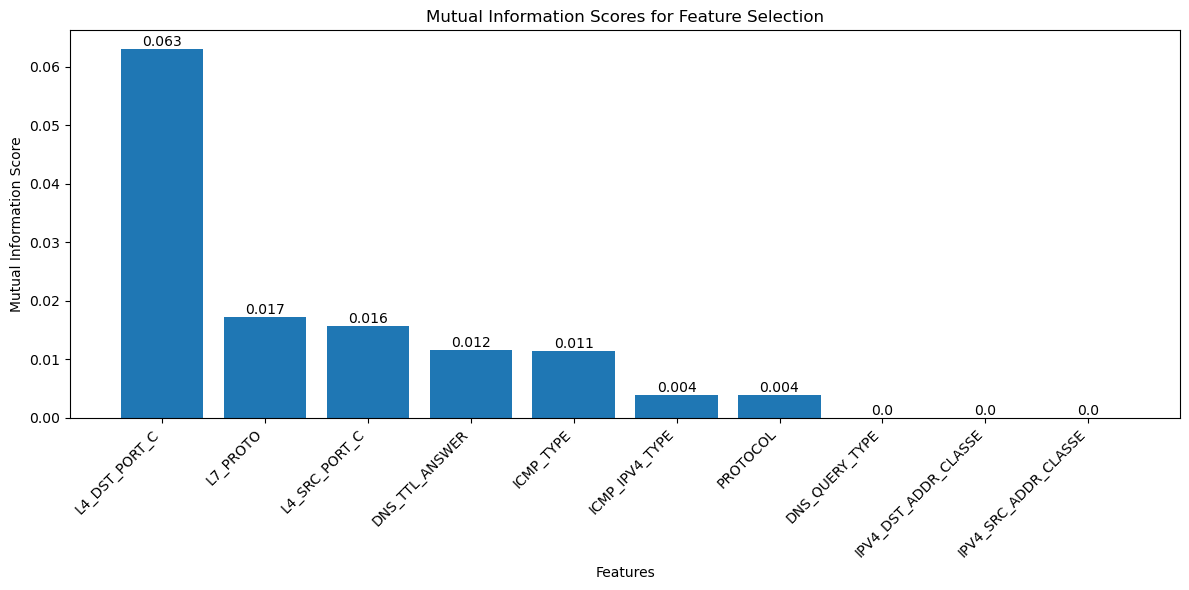

In [47]:
import matplotlib.pyplot as plt

mi_scores = -np.sort(-mi_class)
feature_names = columns_ranked_mi

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(feature_names)), mi_scores, align='center')
plt.xticks(range(len(feature_names)), feature_names, rotation=45, ha="right")
plt.xlabel("Features")
plt.ylabel("Mutual Information Score")
plt.title("Mutual Information Scores for Feature Selection")

# Add MI score values at the top of each bar
for bar, score in zip(bars, mi_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(score, 3),
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

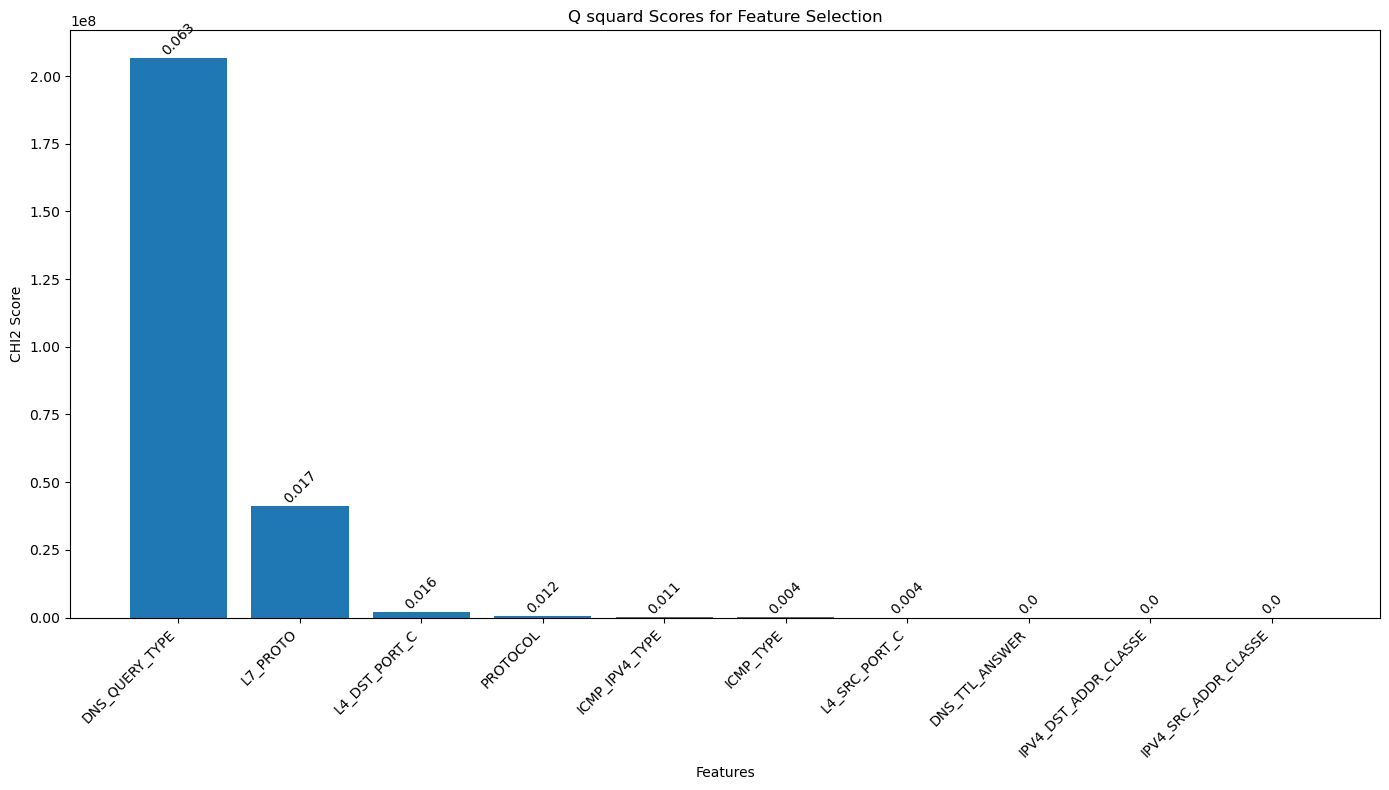

In [48]:
import matplotlib.pyplot as plt

chi2_scores = -np.sort(-chi2_corr[0])
feature_names_chi2 = columns_ranked_chi2

plt.figure(figsize=(14, 8))
bars = plt.bar(range(len(feature_names_chi2)), chi2_scores, align='center')
plt.xticks(range(len(feature_names_chi2)), feature_names_chi2, rotation=45, ha="right")
plt.xlabel("Features")
plt.ylabel("CHI2 Score")
plt.title("Q squard Scores for Feature Selection")

# Add MI score values at the top of each bar
for bar, score in zip(bars, mi_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(score, 3),
             ha='center', va='bottom', rotation=45)

plt.tight_layout()
plt.show()

In [46]:
import pickle

class Company(object):
    def __init__(self, name, value):
        self.name = name
        self.value = value

with open('attribute/ton_num.pkl', 'wb') as outp:
    company1 = Company('mi_class', mi_class)
    pickle.dump(company1, outp, pickle.HIGHEST_PROTOCOL)

    company2 = Company('selected_features_80', selected_features_80)
    pickle.dump(company2, outp, pickle.HIGHEST_PROTOCOL)
    
    company3 = Company('chi2_corr', chi2_corr)
    pickle.dump(company3, outp, pickle.HIGHEST_PROTOCOL)
    
    company4 = Company('sorted_kendall_tau_scores', sorted_kendall_tau_scores)
    pickle.dump(company4, outp, pickle.HIGHEST_PROTOCOL)
    
    company5 = Company('sb_anova', sb)
    pickle.dump(company5, outp, pickle.HIGHEST_PROTOCOL)


### Decision Tree

### MI

In [45]:
import json
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)


In [60]:
from sklearn import tree
from sklearn.model_selection import KFold
import json
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,cohen_kappa_score,matthews_corrcoef


def my_grid_result_df(clf,hyperparams,data_name,algo_name,X,y):
    
    scoring = {"Accuracy": "accuracy", "F1-Score":'f1' ,"Recall": 'recall',
               "Precision":"precision","MCC":make_scorer(matthews_corrcoef), "Kappa":make_scorer(cohen_kappa_score)}
    cv_inner = KFold(n_splits=5, shuffle=True, random_state=1)
    search = GridSearchCV(clf, hyperparams, scoring=scoring, n_jobs=1, cv=cv_inner, refit="MCC")
    grid_result = search.fit(X, y)

    json_dump = json.dumps(grid_result.cv_results_,cls=NumpyEncoder)
    # Serializing json

    # Writing to sample.json
    with open(f"./result_ton_num_bin/{algo_name}__{data_name}.json", "w") as outfile:
        outfile.write(json_dump)


In [47]:
X_A_20.shape

(16940496, 5)

In [48]:
X_A_chi2_20 = pd.concat([X_A_20,X_chi2_20],axis=1)
X_A_chi2_20.shape

(16940496, 14)

In [49]:
X_A_chi2_20 = pd.concat([X_A_20,X_chi2_20],axis=1)
X_A_chi2_50 = pd.concat([X_A_50,X_chi2_50],axis=1)
X_A_chi2_80 = pd.concat([X_A_80,X_chi2_80],axis=1)

X_A_MI_20 = pd.concat([X_A_20,X_MI_20],axis=1)
X_A_MI_50= pd.concat([X_A_50,X_MI_50],axis=1)
X_A_MI_80= pd.concat([X_A_80,X_MI_80],axis=1)

X_A_mRMR_20 = pd.concat([X_A_20,X_mrmr_20],axis=1)
X_A_mRMR_50 = pd.concat([X_A_50,X_mrmr_50],axis=1)
X_A_mRMR_80 = pd.concat([X_A_80,X_mrmr_80],axis=1)

X_K_chi2_20 = pd.concat([X_K_20,X_chi2_20],axis=1)
X_K_chi2_50 = pd.concat([X_K_50,X_chi2_50],axis=1)
X_K_chi2_80 = pd.concat([X_K_80,X_chi2_80],axis=1)

X_K_MI_20 = pd.concat([X_K_20,X_MI_20],axis=1)
X_K_MI_50 = pd.concat([X_K_50,X_MI_50],axis=1)
X_K_MI_80 = pd.concat([X_K_80,X_MI_80],axis=1)

X_K_mRMR_20 = pd.concat([X_K_20,X_mrmr_20],axis=1)
X_K_mRMR_50 = pd.concat([X_K_50,X_mrmr_50],axis=1)
X_K_mRMR_80 = pd.concat([X_K_80,X_mrmr_80],axis=1)

X_PCA_chi2  = pd.concat([X_PCA,X_chi2_80],axis=1)
X_PCA_MI = pd.concat([X_PCA,X_MI_80],axis=1)
X_PCA_mRMR = pd.concat([X_PCA,X_mrmr_80],axis=1)

In [50]:
print(X_A_chi2_20.shape)
print(X_A_chi2_50.shape)
print(X_A_chi2_80.shape)
print(X_A_MI_20.shape)
print(X_A_MI_50.shape)
print(X_A_MI_80.shape)
print(X_A_mRMR_20.shape)
print(X_A_mRMR_50.shape)
print(X_A_mRMR_80.shape)
print(X_K_chi2_20.shape)
print(X_K_chi2_50.shape)
print(X_K_chi2_80.shape)
print(X_K_MI_20.shape)
print(X_K_MI_50.shape)
print(X_K_MI_80.shape)
print(X_K_mRMR_20.shape)
print(X_K_mRMR_50.shape)
print(X_K_mRMR_80.shape)
print(X_PCA_chi2.shape)
print(X_PCA_MI.shape)
print(X_PCA_mRMR.shape)

(16940496, 14)
(16940496, 33)
(16940496, 46)
(16940496, 17)
(16940496, 31)
(16940496, 46)
(16940496, 10)
(16940496, 36)
(16940496, 54)
(16940496, 14)
(16940496, 33)
(16940496, 46)
(16940496, 17)
(16940496, 31)
(16940496, 46)
(16940496, 10)
(16940496, 36)
(16940496, 54)
(16940496, 39)
(16940496, 39)
(16940496, 47)


In [52]:


dummy_feature = ['L4_SRC_PORT_C','L4_DST_PORT_C','IPV4_SRC_ADDR_CLASSE',
                 'IPV4_DST_ADDR_CLASSE','PROTOCOL','L7_PROTO']
X_cat_dm = pd.get_dummies(X_cat, columns=dummy_feature)
X =  pd.concat([X_Numerical_sc,X_cat_dm],axis=1)
X.shape

(16940496, 61)

In [53]:
datasets = {"X_A_chi2_20":X_A_chi2_20,
"X_A_chi2_50":X_A_chi2_50,
"X_A_chi2_80":X_A_chi2_80,
"X_A_MI_20":X_A_MI_20,
"X_A_MI_50":X_A_MI_50,
"X_A_MI_80":X_A_MI_80,
"X_A_mRMR_20":X_A_mRMR_20,
"X_A_mRMR_50":X_A_mRMR_50,
"X_A_mRMR_80":X_A_mRMR_80,
"X_K_chi2_20":X_K_chi2_20,
"X_K_chi2_50":X_K_chi2_50,
"X_K_chi2_80":X_K_chi2_80,
"X_K_MI_20":X_K_MI_20,
"X_K_MI_50":X_K_MI_50,
"X_K_MI_80":X_K_MI_80,
"X_K_mRMR_20":X_K_mRMR_20,
"X_K_mRMR_50":X_K_mRMR_50,
"X_K_mRMR_80":X_K_mRMR_80,
"X_PCA_chi2":X_PCA_chi2,
"X_PCA_MI":X_PCA_MI,
"X_PCA_mRMR":X_PCA_mRMR,
           "X":X}

In [61]:
import datetime
def create_all_result(clf,algo_name,hyperparams,datasets,y):
    for k,v in datasets.items():
        now = datetime.datetime.now()
        print(f'======== process======= dataset : {k} \t time is {now}')
        my_grid_result_df(clf,hyperparams,k,algo_name,v,y)
        now = datetime.datetime.now()
        print(f'======== Done  ======== dataset : {k} \t time is {now}')
        print('\n')


# Decision Tree

In [86]:
clf = tree.DecisionTreeClassifier()
hyperparams = {}
create_all_result(clf,'DecisionTreeClassifier',hyperparams,datasets,y_b)

======== process======= dataset : X_A_chi2_20 	 time is 2023-03-11 13:01:27.885369
======== Done  ======== dataset : X_A_chi2_20 	 time is 2023-03-11 13:03:20.267309


======== process======= dataset : X_A_chi2_50 	 time is 2023-03-11 13:03:20.267309
======== Done  ======== dataset : X_A_chi2_50 	 time is 2023-03-11 13:10:09.031304


======== process======= dataset : X_A_chi2_80 	 time is 2023-03-11 13:10:09.031304
======== Done  ======== dataset : X_A_chi2_80 	 time is 2023-03-11 13:23:15.800159


======== process======= dataset : X_A_MI_20 	 time is 2023-03-11 13:23:15.800159
======== Done  ======== dataset : X_A_MI_20 	 time is 2023-03-11 13:25:49.004255


======== process======= dataset : X_A_MI_50 	 time is 2023-03-11 13:25:49.004255
======== Done  ======== dataset : X_A_MI_50 	 time is 2023-03-11 13:34:17.582271


======== process======= dataset : X_A_MI_80 	 time is 2023-03-11 13:34:17.582271
======== Done  ======== dataset : X_A_MI_80 	 time is 2023-03-11 13:45:56.523527


====

In [55]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

### AdaBoostClassifier, GradientBoostingClassifier


In [62]:
def print_skip():
    print('\n')
    print('*************** \t ******************* \t ****************')
    print('*************** \t ******************* \t ****************')
    print('\n')
    


In [ ]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import  CatBoostClassifier
from xgboost import  XGBClassifier


clf = GradientBoostingClassifier(random_state=0)
hyperparams = {'n_estimators':[50, 100, 150,200]}

print('======================= GradientBoostingClassifier =====================')
create_all_result(clf,'GradientBoostingClassifier',hyperparams,datasets,y_b)
print_skip()

print('======================= AdaBoostClassifier =====================')
clf =  AdaBoostClassifier(random_state=0)
create_all_result(clf,'AdaBoostClassifier',hyperparams,datasets,y_b)
print_skip()


print('======================= XGBClassifier =====================')
clf = XGBClassifier(random_state=0)
create_all_result(clf,'XGBClassifier',hyperparams,datasets,y_b)
print_skip()

print('======================= LGBMClassifier =====================')
clf = LGBMClassifier(random_state=0)
create_all_result(clf,'LGBMClassifier',hyperparams,datasets,y_b)
print_skip()

print('======================= CatBoostClassifier =====================')
clf =  CatBoostClassifier(random_state=0)
create_all_result(clf,'CatBoostClassifier',hyperparams,datasets,y_b)


======================= GradientBoostingClassifier =====================
======== process======= dataset : X_A_chi2_20 	 time is 2023-04-02 14:50:59.791138


### Multiclassification

In [ ]:
y_multi = y_multi.replace('Benign',0)
y_multi = y_multi.replace('scanning',1)
y_multi = y_multi.replace('xss',2)
y_multi = y_multi.replace('ddos',3)
y_multi = y_multi.replace('password',4)
y_multi = y_multi.replace('dos',5)
y_multi = y_multi.replace('injection',6)
y_multi = y_multi.replace('backdoor',7)
y_multi = y_multi.replace('mitm',8)
y_multi = y_multi.replace('ransomware',9)



In [ ]:
y_multi.value_counts()

### Mutual Information

In [ ]:
from sklearn.feature_selection import mutual_info_classif


mi_class = mutual_info_classif(X_cat, y_multi)

columns_ranked_mi = list(X_cat.columns[np.argsort(-mi_class_multi)])

columns_ranked_mi

In [30]:
X_MI_20 = X_cat[columns_ranked_mi[:2]]
X_MI_50 =  X_cat[columns_ranked_mi[:5]]
X_MI_80 =  X_cat[columns_ranked_mi[:8]]

list_dummy_20 = list(set( list(X_MI_20.columns)).intersection(dummy_feature))
list_dummy_50 = list(set( list(X_MI_50.columns)).intersection(dummy_feature))
list_dummy_80 = list(set( list(X_MI_80.columns)).intersection(dummy_feature))


X_MI_20 = pd.get_dummies(X_MI_20, columns=list_dummy_20)
X_MI_50 = pd.get_dummies(X_MI_50, columns=list_dummy_50)
X_MI_80 = pd.get_dummies(X_MI_80, columns=list_dummy_80)

In [32]:
X_MI_20 = X[columns_ranked_mi[:7]]
X_MI_50 =  X[columns_ranked_mi[:18]]
X_MI_80 =  X[columns_ranked_mi[:25]]

dummy_feature = ['L4_SRC_PORT_C','L4_DST_PORT_C','IPV4_SRC_ADDR_CLASSE',
                 'IPV4_DST_ADDR_CLASSE','PROTOCOL','L7_PROTO']

list_dummy_20 = list(set( list(X_MI_20.columns)).intersection(dummy_feature))
list_dummy_50 = list(set( list(X_MI_50.columns)).intersection(dummy_feature))
list_dummy_80 = list(set( list(X_MI_80.columns)).intersection(dummy_feature))


X_MI_20 = pd.get_dummies(X_MI_20, columns=list_dummy_20)
X_MI_50 = pd.get_dummies(X_MI_50, columns=list_dummy_50)
X_MI_80 = pd.get_dummies(X_MI_80, columns=list_dummy_80)

### CHI2


In [55]:
from sklearn.feature_selection import chi2

chi2_corr = chi2(X, y_multi)
columns_ranked_chi2 = list(X.columns[np.argsort(-chi2_corr[0])])
columns_ranked_chi2

['DNS_QUERY_TYPE',
 'L7_PROTO',
 'OUT_BYTES',
 'DST_TO_SRC_SECOND_BYTES',
 'IN_BYTES',
 'SRC_TO_DST_SECOND_BYTES',
 'PROTOCOL',
 'TCP_WIN_MAX_OUT',
 'OUT_PKTS',
 'IN_PKTS',
 'DST_TO_SRC_AVG_THROUGHPUT',
 'LONGEST_FLOW_PKT',
 'MIN_IP_PKT_LEN',
 'NUM_PKTS_UP_TO_128_BYTES',
 'MIN_TTL',
 'L4_DST_PORT_C',
 'TCP_WIN_MAX_IN',
 'TCP_FLAGS',
 'SHORTEST_FLOW_PKT',
 'NUM_PKTS_512_TO_1024_BYTES',
 'SRC_TO_DST_AVG_THROUGHPUT',
 'DURATION_OUT',
 'NUM_PKTS_256_TO_512_BYTES',
 'DURATION_IN',
 'FLOW_DURATION_MILLISECONDS',
 'DNS_TTL_ANSWER',
 'ICMP_IPV4_TYPE',
 'ICMP_TYPE',
 'IPV4_DST_ADDR_CLASSE',
 'L4_SRC_PORT_C',
 'IPV4_SRC_ADDR_CLASSE',
 'RETRANSMITTED_OUT_BYTES',
 'RETRANSMITTED_IN_PKTS',
 'RETRANSMITTED_IN_BYTES',
 'NUM_PKTS_128_TO_256_BYTES']

In [34]:
X_chi2_20 = X[columns_ranked_chi2[:2]]
X_chi2_50 =  X[columns_ranked_chi2[:5]]
X_chi2_80 =  X[columns_ranked_chi2[:8]]

list_dummy_20 = list(set( list(X_chi2_20.columns)).intersection(dummy_feature))
list_dummy_50 = list(set( list(X_chi2_50.columns)).intersection(dummy_feature))
list_dummy_80 = list(set( list(X_chi2_80.columns)).intersection(dummy_feature))


X_chi2_20 = pd.get_dummies(X_chi2_20, columns=list_dummy_20)
X_chi2_50 = pd.get_dummies(X_chi2_50, columns=list_dummy_50)
X_chi2_80 = pd.get_dummies(X_chi2_80, columns=list_dummy_80)

##  mRMR, which stands for "minimum Redundancy - Maximum Relevance",

## mRMR

In [35]:
from mrmr import mrmr_classif
selected_features_20 = mrmr_classif(X=X, y=y_multi, K=7)
selected_features_50 = mrmr_classif(X=X, y=y_multi, K=18)
selected_features_80 = mrmr_classif(X=X, y=y_multi, K=25)

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [02:28<00:00,  5.96s/it]


In [36]:
selected_features_80

['IN_BYTES',
 'PROTOCOL',
 'DST_TO_SRC_SECOND_BYTES',
 'MIN_IP_PKT_LEN',
 'TCP_WIN_MAX_OUT',
 'LONGEST_FLOW_PKT',
 'SRC_TO_DST_SECOND_BYTES',
 'MIN_TTL',
 'OUT_BYTES',
 'SHORTEST_FLOW_PKT',
 'TCP_WIN_MAX_IN',
 'OUT_PKTS',
 'NUM_PKTS_UP_TO_128_BYTES',
 'DNS_QUERY_TYPE',
 'DST_TO_SRC_AVG_THROUGHPUT',
 'IN_PKTS',
 'NUM_PKTS_512_TO_1024_BYTES',
 'FLOW_DURATION_MILLISECONDS',
 'SRC_TO_DST_AVG_THROUGHPUT',
 'DURATION_OUT',
 'DURATION_IN',
 'IPV4_DST_ADDR_CLASSE',
 'DNS_TTL_ANSWER',
 'NUM_PKTS_256_TO_512_BYTES',
 'TCP_FLAGS']

In [37]:
X_mrmr_80 = X[selected_features_80]
X_mrmr_50 = X[selected_features_50]
X_mrmr_20 = X[selected_features_20]

list_dummy_20 = list(set( list(X_mrmr_20.columns)).intersection(dummy_feature))
list_dummy_50 = list(set( list(X_mrmr_50.columns)).intersection(dummy_feature))
list_dummy_80 = list(set( list(X_mrmr_80.columns)).intersection(dummy_feature))

X_mrmr_20 = pd.get_dummies(X_mrmr_20, columns=list_dummy_20)
X_mrmr_50 = pd.get_dummies(X_mrmr_50, columns=list_dummy_50)
X_mrmr_80 = pd.get_dummies(X_mrmr_80, columns=list_dummy_80)

In [38]:
datasets_multi = {'X_chi2_20':X_chi2_20,
            'X_chi2_50':X_chi2_50,
            'X_chi2_80':X_chi2_80,
            'X_MI_20':X_MI_20,
            'X_MI_50':X_MI_50,
            'X_MI_80':X_MI_80,
            'X_mrmr_20':X_mrmr_20,
            'X_mrmr_50':X_mrmr_50,
            'X_mrmr_80':X_mrmr_80,
            'X':X}

## Building the models 

In [42]:
from sklearn import tree
from sklearn.model_selection import KFold
import json
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,cohen_kappa_score,matthews_corrcoef,accuracy_score,precision_score,recall_score


def my_grid_result_df(clf,hyperparams,data_name,algo_name,X,y):
    
    scoring = {"Accuracy": make_scorer(accuracy_score),
               "F1-Score":'f1_macro' ,
               "Recall":  make_scorer(recall_score,average='macro'),
              # "Precision": make_scorer(precision_score, average='macro'),
               "MCC":make_scorer(matthews_corrcoef),
               "Kappa":make_scorer(cohen_kappa_score)
              }
    cv_inner = KFold(n_splits=5, shuffle=True, random_state=1)
    search = GridSearchCV(clf, hyperparams, scoring=scoring, n_jobs=-1, cv=cv_inner, refit="Kappa")
    grid_result = search.fit(X, y)

    json_dump = json.dumps(grid_result.cv_results_,cls=NumpyEncoder)
    # Serializing json

    # Writing to sample.json
    with open(f"./result_multi/{algo_name}__{data_name}.json", "w") as outfile:
        outfile.write(json_dump)


def create_all_result(clf,algo_name,hyperparams,datasets,y):
    for k,v in datasets.items():
        now = datetime.datetime.now()
        print(f'======== process======= dataset : {k} \t time is {now}')
        my_grid_result_df(clf,hyperparams,k,algo_name,v,y)
        now = datetime.datetime.now()
        print(f'======== Done  ======== dataset : {k} \t time is {now}')
        print('\n')

In [43]:
y_multi.value_counts()

0    6099469
1    3781419
2    2455020
3    2026234
4    1153323
5     712609
6     684465
7      16809
8       7723
9       3425
Name: Attack, dtype: int64

In [ ]:
clf = tree.DecisionTreeClassifier()
hyperparams = {}
create_all_result(clf,'DecisionTreeClassifier',hyperparams,datasets_multi,y_multi)
print('======================= LGBMClassifier =====================')
clf = LGBMClassifier(random_state=0)
create_all_result(clf,'LGBMClassifier',hyperparams,datasets_multi,y_multi)
print_skip()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import  CatBoostClassifier

hyperparams = {'n_estimators':[50, 100, 150,200]}




print('======================= XGBClassifier =====================')
clf = XGBClassifier(random_state=0)
create_all_result(clf,'XGBClassifier',hyperparams,datasets_multi,y_multi)
print_skip()

hyperparams = {'n_estimators':[50, 100, 150,200]}

print('======================= GradientBoostingClassifier =====================')
clf = GradientBoostingClassifier(random_state=0)
create_all_result(clf,'GradientBoostingClassifier',hyperparams,datasets_multi,y_multi)
print_skip()

print('======================= AdaBoostClassifier =====================')
clf =  AdaBoostClassifier(random_state=0)
create_all_result(clf,'AdaBoostClassifier',hyperparams,datasets_multi,y_multi)
print_skip()


print('======================= CatBoostClassifier =====================')
clf =  CatBoostClassifier(random_state=0)
create_all_result(clf,'CatBoostClassifier',hyperparams,datasets_multi,y_multi)


======================= XGBClassifier =====================
======== process======= dataset : X_chi2_20 	 time is 2023-03-09 13:22:20.552555
======== Done  ======== dataset : X_chi2_20 	 time is 2023-03-09 21:36:09.542398


======== process======= dataset : X_chi2_50 	 time is 2023-03-09 21:36:09.542398
======== Done  ======== dataset : X_chi2_50 	 time is 2023-03-10 09:30:21.370587


======== process======= dataset : X_chi2_80 	 time is 2023-03-10 09:30:21.370587
======== Done  ======== dataset : X_chi2_80 	 time is 2023-03-10 23:46:42.017744


======== process======= dataset : X_MI_20 	 time is 2023-03-10 23:46:42.017744
======== Done  ======== dataset : X_MI_20 	 time is 2023-03-11 05:48:33.950368


======== process======= dataset : X_MI_50 	 time is 2023-03-11 05:48:33.950368
